In [15]:
import sys
import matplotlib.pyplot as plt

sys.path.append('./../')

from utils.phase_1 import *
BLAZE_FACE_PATH = './../utils/libs/BlazeFace/'

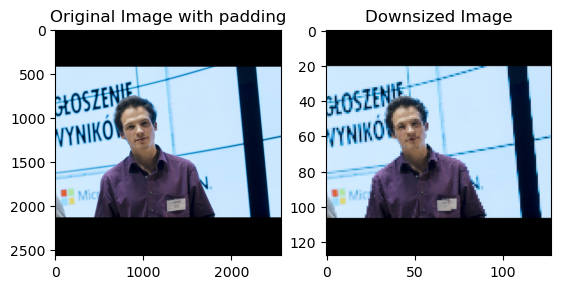

In [16]:
## Select taking a photo or using a sample image

# original_img = take_photo()
original_img = cv2.imread('../assets/model2.jpg')

original_img = reverse_channels(original_img)
original_img = make_image_rectangle(original_img)
downsized_img = downsize_img(original_img, BLAZEFACE_INPUT_SIZE)

_, ax = plt.subplots(1, 2)
ax[0].imshow(original_img)
ax[0].set_title('Original Image with padding')
ax[1].imshow(downsized_img)
ax[1].set_title('Downsized Image')
plt.show()

In [17]:
device = get_torch_device()
print(device)

model = load_blazeface(BLAZE_FACE_PATH, device)
configure_params(model, min_score_thresh=0.75, min_suppression_threshold=0.3)

PyTorch version: 2.1.0
CUDA version: None
cuDNN version: None
cpu


In [18]:
detections = model.predict_on_image(downsized_img)
assert len(detections) != 0, 'No faces detected'
detections.shape

torch.Size([1, 17])

Found 1 faces


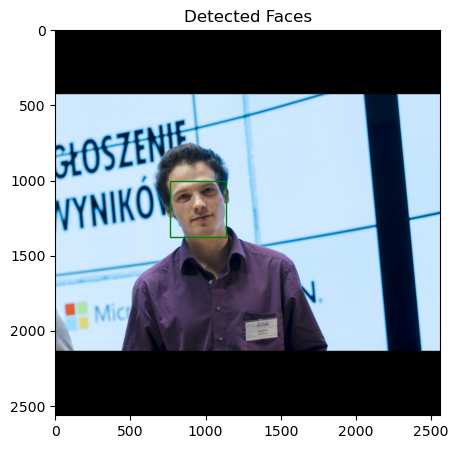

In [19]:
plot_detections(original_img, detections, title='Detected Faces')

In [20]:
biggest_face_idx = get_idx_of_biggest_face(detections)
print(f"Biggest face id: {biggest_face_idx}")

Biggest face id: 0


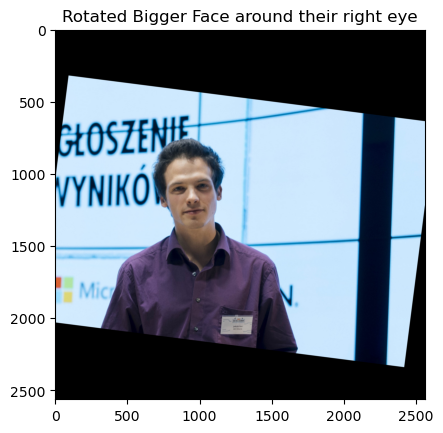

In [21]:
rotated_img = reset_face_angle(original_img, detections[biggest_face_idx])
plt.imshow(rotated_img)
plt.title("Rotated Bigger Face around their right eye")
plt.show()

Found 1 faces


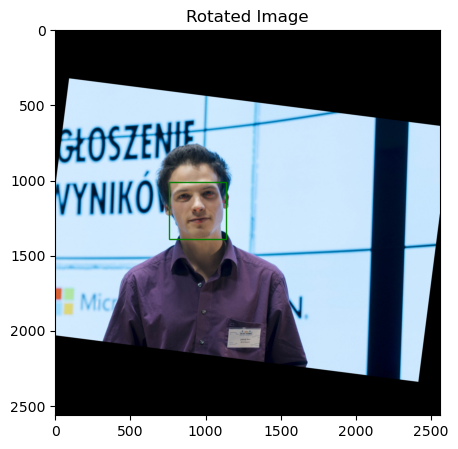

In [22]:
downsized_img = downsize_img(rotated_img, BLAZEFACE_INPUT_SIZE)
detections = model.predict_on_image(downsized_img)

plot_detections(rotated_img, detections, title="Rotated Image")

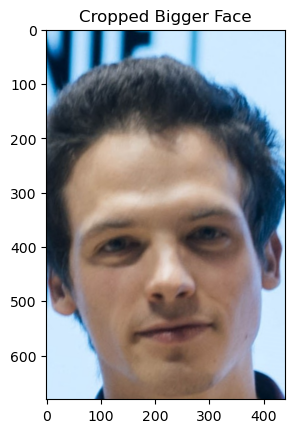

In [23]:
cropped_face = crop_face_from_img(
 img=rotated_img, 
 detections=detections[biggest_face_idx],
 margin=Margin("30%", 30, 30, 0) 
)
plt.imshow(cropped_face)
plt.title("Cropped Bigger Face")
plt.show()

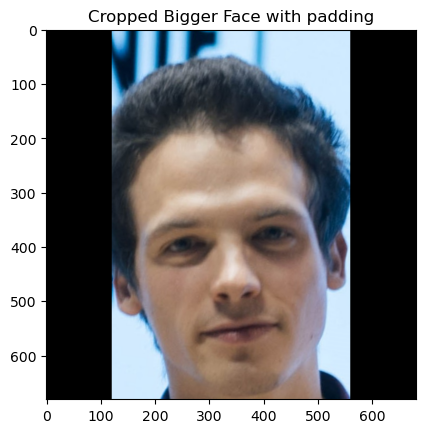

In [24]:
rectangle_img = make_image_rectangle(cropped_face)
plt.imshow(rectangle_img)
plt.title("Cropped Bigger Face with padding")
plt.show()